<a href="https://colab.research.google.com/github/yvettezheng11/learning/blob/main/ImageGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Urban_planning_GAN-SPL3-main.zip to Urban_planning_GAN-SPL3-main.zip


In [9]:
import os
os.listdir("/content")


['.config',
 'MAP.zip',
 'Urban_planning_GAN-SPL3-main.zip',
 'plan1.png',
 'sample_data']

In [40]:
import zipfile
import os

zip_path = "/content/MAP.zip"
extract_path = "/content/MAP"

# 确保目标目录存在
os.makedirs(extract_path, exist_ok=True)

# 尝试解压
try:
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("解压完成！")
except zipfile.BadZipFile:
    print("文件可能已损坏，请重新上传 ZIP 文件。")


文件可能已损坏，请重新上传 ZIP 文件。


In [41]:
with zipfile.ZipFile("/content/MAP.zip", "r") as zip_ref:
    print(zip_ref.namelist())  # 列出 ZIP 内部文件


BadZipFile: File is not a zip file

In [10]:
import zipfile
import os

zip_path = "/content/Urban_planning_GAN-SPL3-main.zip"  # 这里填写正确的 ZIP 文件路径
extract_path = "/content/Urban_planning_GAN-SPL3-main"  # 解压后的文件夹路径

# 解压文件
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# 列出解压后的文件
os.listdir(extract_path)



['Urban_planning_GAN-SPL3-main']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
from google.colab import files
uploaded = files.upload()

Saving plan1.png to plan1 (1).png


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
print(os.listdir("/content/drive"))
print(os.listdir("/content/drive/My Drive"))  # 确保目标目录存在

['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0', '.Encrypted']
['Colab Notebooks', '111']


In [15]:
import shutil

# Specify the source file path (where you uploaded the file)
source_file = "/content/MAP.zip"

# Specify the destination folder in your Google Drive
destination_folder = "/content/drive/MyDrive/"

# 确保目标文件夹存在
os.makedirs(destination_folder, exist_ok=True)

# 复制文件到 Google Drive
shutil.copy(source_file, destination_folder)

print("✅ 文件成功复制到 Google Drive！")


✅ 文件成功复制到 Google Drive！


In [3]:
!ls /content/


plan1.png  sample_data


In [6]:
!ls /content/Urban_planning_GAN-SPL3/data/

ls: cannot access '/content/Urban_planning_GAN-SPL3/data/': No such file or directory


# New Section

In [22]:
import os
print(os.listdir("/content"))

['.config', 'MAP.zip', 'plan1 (1).png', 'B4_Groundplan_2011.png', 'Urban_planning_GAN-SPL3-main.zip', 'Urban_planning_GAN-SPL3-main', 'plan1.png', 'drive', 'sample_data']
['.config', 'MAP.zip', 'plan1 (1).png', 'B4_Groundplan_2011.png', 'Urban_planning_GAN-SPL3-main.zip', 'Urban_planning_GAN-SPL3-main', 'plan1.png', 'drive', 'sample_data']


In [25]:
from google.colab import files
uploaded = files.upload()  # 手动上传文件

Saving B4_Groundplan_2011.png to B4_Groundplan_2011 (1).png


Image loaded successfully.


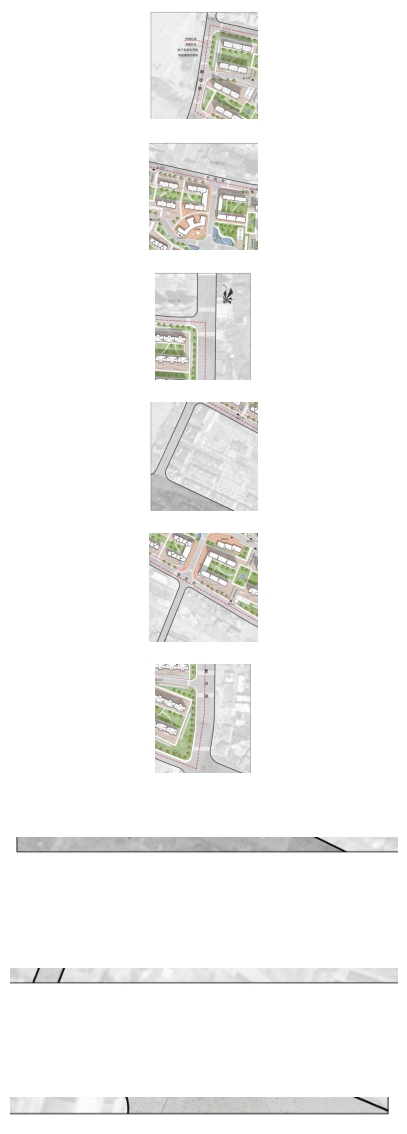

In [26]:
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the uploaded image
image_path = "/content/B4_Groundplan_2011 (1).png"
image = cv2.imread(image_path)
if image is None:
    print("Failed to load image. Check file path or format.")
else:
    print("Image loaded successfully.")


# Get the dimensions of the image
height, width, _ = image.shape

# Define the size of the sub-images
sub_image_size = 512

sub_images = []
for y in range(0, height, sub_image_size):
    for x in range(0, width, sub_image_size):
        sub_image = image[y:y+sub_image_size, x:x+sub_image_size]
        sub_images.append(sub_image)



# Display the sub-images
# Adjust the figure size to make the images larger
plt.figure(figsize=(5, 15))  # Adjust the width and height as needed

# Display the sub-images vertically
for i, sub_image in enumerate(sub_images):
    plt.subplot(len(sub_images), 1, i + 1)  # Create a grid with rows for each sub-image
    plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))

    # Remove the axis to make it look better
    plt.axis('off')

    # Adjust the aspect ratio to make sure the images are not stretched
    plt.gca().set_aspect('equal')

# Show the vertically stacked sub-images
plt.show()





In [27]:
compressed_sub_images = [cv2.resize(sub_image, (256, 256)) for sub_image in sub_images]


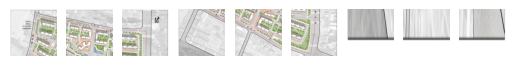

In [28]:
import matplotlib.pyplot as plt

for i, sub_image in enumerate(compressed_sub_images):
    plt.subplot(1, len(compressed_sub_images), i + 1)
    plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()


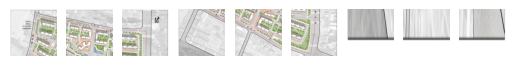

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os
import shutil

# Define the name of the sub-folder inside the "Downloads" directory
sub_folder_name = "folder1"

# Create the full path to the sub-folder
save_directory = os.path.join("/content/Downloads", sub_folder_name)
os.makedirs(save_directory, exist_ok=True)

for i, sub_image in enumerate(compressed_sub_images):
    # Save each sub-image with a unique filename inside the sub-folder
    sub_image_filename = os.path.join(save_directory, f"sub_image_{i}.jpg")
    cv2.imwrite(sub_image_filename, sub_image)

    # Display the sub-image
    plt.subplot(1, len(compressed_sub_images), i + 1)
    plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Show the sub-images in your Colab notebook
plt.show()

# Create a zip archive of the sub-folder
shutil.make_archive("/content/Downloads/folder1_archive", 'zip', save_directory)

# Provide a download link for the zip archive
files.download("/content/Downloads/folder1_archive.zip")


# **Above process for multiple image\\**

In [30]:
from google.colab import files
uploaded_folder = files.upload()


Saving folder1_archive.zip to folder1_archive.zip


In [ ]:
import zipfile
import os

zip_path = "/content/Urban_planning_GAN-SPL3-main.zip"  # 这里填写正确的 ZIP 文件路径
extract_path = "/content/Urban_planning_GAN-SPL3-main"  # 解压后的文件夹路径

# 解压文件
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# 列出解压后的文件
os.listdir(extract_path)


In [31]:
import zipfile
import os

# 这里改成你的 ZIP 文件的路径
zip_path = "/content/folder1_archive.zip"

# 这里指定解压后的文件夹路径
extract_path = "/content/folder1_archive"

# 解压文件
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# 列出解压后的文件
os.listdir(extract_path)

print(os.listdir(extract_path))

['sub_image_8.jpg', 'sub_image_6.jpg', 'sub_image_0.jpg', 'sub_image_1.jpg', 'sub_image_5.jpg', 'sub_image_7.jpg', 'sub_image_4.jpg', 'sub_image_3.jpg', 'sub_image_2.jpg']


In [33]:
import os

# Path to the directory containing the extracted files
extracted_directory = "/content/folder1_archive"

# List all files in the directory
files = os.listdir(extracted_directory)

# Show all the files
for file in files:
    print(f"File: {file}")


File: sub_image_8.jpg
File: sub_image_6.jpg
File: sub_image_0.jpg
File: sub_image_1.jpg
File: sub_image_5.jpg
File: sub_image_7.jpg
File: sub_image_4.jpg
File: sub_image_3.jpg
File: sub_image_2.jpg


In [35]:
import os
print(os.listdir("/content/drive/MyDrive"))

['Colab Notebooks', '111', 'MAP.zip']


In [38]:
import os

zip_path = "/content/drive/MyDrive/MAP.zip"

# 检查文件是否存在
if os.path.exists(zip_path):
    print("文件存在，大小：", os.path.getsize(zip_path), "字节")
else:
    print("文件不存在，请检查路径")

文件存在，大小： 0 字节


In [39]:
!python /content/Urban_planning_GAN-SPL3/UrbanPlan2021/model/CGAN.py

python3: can't open file '/content/Urban_planning_GAN-SPL3/UrbanPlan2021/model/CGAN.py': [Errno 2] No such file or directory


In [37]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/MAP.zip"  # 确保这个文件存在
extract_path = "/content/drive/MyDrive/extracted_folder"

# 创建解压目标文件夹
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 解压文件
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# 确认解压后的文件
print("解压完成，文件列表：", os.listdir(extract_path))

BadZipFile: File is not a zip file

In [36]:
print(os.listdir("/content/drive/MyDrive/extracted_folder"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/extracted_folder'

In [42]:
from google.colab import files
uploaded_folder = files.upload()

Saving 347_buildings.csv.gz to 347_buildings.csv.gz


In [43]:
import gzip
import shutil
import os

# 设定文件路径
gz_path = "/content/347_buildings.csv.gz"  # 你的 .gz 文件路径
csv_path = "/content/347_buildings.csv"    # 解压后的 CSV 文件路径

# 确保文件存在
if not os.path.exists(gz_path):
    print("文件不存在，请检查上传是否成功！")
else:
    # 解压 .gz 文件
    with gzip.open(gz_path, 'rb') as f_in:
        with open(csv_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    print(f"解压完成！CSV 文件保存为: {csv_path}")

    # 确认解压后的文件
    print("文件列表:", os.listdir("/content"))


解压完成！CSV 文件保存为: /content/347_buildings.csv
文件列表: ['.config', 'MAP.zip', '347_buildings.csv', 'plan1 (1).png', 'B4_Groundplan_2011.png', 'folder1_archive', 'folder1_archive.zip', 'B4_Groundplan_2011 (1).png', 'MAP', 'Urban_planning_GAN-SPL3-main.zip', 'Downloads', '347_buildings.csv.gz', 'Urban_planning_GAN-SPL3-main', 'plan1.png', 'drive', 'sample_data']


In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 设定解压后的 CSV 文件路径
csv_path = "/content/347_buildings.csv"

# 确保文件存在
if not os.path.exists(csv_path):
    print("文件不存在，请检查解压是否成功！")
else:
    # 读取 CSV 数据
    df = pd.read_csv(csv_path)

    # 显示数据前几行
    print("数据预览：")
    print(df.head())

    # 显示列名，检查数据格式
    print("\n数据列名：", df.columns)

    # 可视化数据（如果适用）
    plt.figure(figsize=(10, 5))

    # 假设 CSV 里面有 "建筑面积" (Building Area) 这一列，我们画一个直方图
    column_name = "建筑面积"  # 替换成你的实际列名
    if column_name in df.columns:
        df[column_name].hist(bins=20, color='blue', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel("数量")
        plt.title(f"{column_name} 直方图")
        plt.show()
    else:
        print(f"列 {column_name} 不存在，请检查 CSV 文件的列名。")


数据预览：
    latitude   longitude  area_in_meters  confidence  \
0  20.350094  121.940043         21.6580      0.6949   
1  20.449283  121.971419         79.2636      0.7364   
2  20.788217  121.840965         26.5766      0.7419   
3  20.331853  121.874863        140.0704      0.6531   
4  20.445648  121.967295         40.2634      0.8114   

                                            geometry full_plus_code  
0  POLYGON((121.940073917097 20.3501017592655, 12...  7QG39W2R+22MM  
1  POLYGON((121.971383486526 20.4492325675594, 12...  7QG3CXXC+PH77  
2  POLYGON((121.841003206103 20.7882120629689, 12...  7QG3QRQR+79PQ  
3  POLYGON((121.874950619513 20.3318450028032, 12...  7QG38VJF+PWX4  
4  POLYGON((121.967343285481 20.4456519257616, 12...  7QG3CXW8+7W3V  

数据列名： Index(['latitude', 'longitude', 'area_in_meters', 'confidence', 'geometry',
       'full_plus_code'],
      dtype='object')
列 建筑面积 不存在，请检查 CSV 文件的列名。


<Figure size 1000x500 with 0 Axes>

In [45]:
import cv2
import os
import zipfile
import shutil
from google.colab import files

# 指定存放原始图片的目录
original_images_folder = "/content/drive/MyDrive/extracted_folder"  # 修改为正确的解压路径

# 处理后的图片存放目录
processed_images_folder = "/content/processed_images"
os.makedirs(processed_images_folder, exist_ok=True)

# 定义切割图片的函数 (700x700)
def create_sub_images(image, size=700):
    sub_images = []
    for i in range(0, image.shape[0], size):
        for j in range(0, image.shape[1], size):
            sub_image = image[i:i+size, j:j+size]
            sub_images.append(sub_image)
    return sub_images

# 定义缩放图片的函数 (256x256)
def resize_image(image, new_size=256):
    return cv2.resize(image, (new_size, new_size))

# 遍历文件夹内的所有图片文件
for filename in os.listdir(original_images_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(original_images_folder, filename)
        image = cv2.imread(img_path)

        # 处理异常情况：图像为空
        if image is None:
            print(f"无法读取图像: {filename}, 请检查文件是否损坏或路径是否正确！")
            continue

        original_image_name = os.path.splitext(filename)[0]

        # 为该图像创建一个单独的文件夹存放子图
        original_image_download_folder = os.path.join(processed_images_folder, original_image_name)
        os.makedirs(original_image_download_folder, exist_ok=True)

        # 切割图片并压缩
        sub_images = create_sub_images(image)
        for i, sub_image in enumerate(sub_images):
            compressed_image = resize_image(sub_image, 256)
            sub_image_filename = os.path.join(original_image_download_folder, f"sub_image_{i}.jpg")
            cv2.imwrite(sub_image_filename, compressed_image)

# 压缩所有文件夹
zip_files = []
for folder in os.listdir(processed_images_folder):
    folder_path = os.path.join(processed_images_folder, folder)
    if os.path.isdir(folder_path):
        zip_path = f"{folder_path}.zip"
        shutil.make_archive(folder_path, 'zip', folder_path)
        zip_files.append(zip_path)

# 提供下载链接
for zip_file in zip_files:
    files.download(zip_file)

print("所有图片处理完成，并已打包下载！")


所有图片处理完成，并已打包下载！


In [47]:
import shutil
import os
from google.colab import files

# Directory where the processed sub-images are stored
sub_images_folder = "/content/Downloads/processed_images"

# **创建文件夹以防止报错**
os.makedirs(sub_images_folder, exist_ok=True)

# Iterate through sub-folders and create zip archives
for folder in os.listdir(sub_images_folder):
    folder_path = os.path.join(sub_images_folder, folder)
    if os.path.isdir(folder_path):
        # Specify the path for the zip file
        zip_filename = os.path.join("/content/Downloads", f"{folder}.zip")

        # Create a zip archive of the sub-folder’s contents
        shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', folder_path)

# Provide download links for the zip archives
for folder in os.listdir(sub_images_folder):
    if os.path.isdir(os.path.join(sub_images_folder, folder)):
        zip_filename = os.path.join("/content/Downloads", f"{folder}.zip")
        files.download(zip_filename)

print("所有文件已成功打包并准备下载！")


所有文件已成功打包并准备下载！


In [48]:
# Download the zip archives
for folder in os.listdir(processed_images_folder):
    if os.path.isdir(os.path.join(processed_images_folder, folder)):
        zip_filename = os.path.join("/content/Downloads", f"{folder}.zip")
        if os.path.exists(zip_filename):
            print(f"Downloading: {zip_filename}")
            files.download(zip_filename)
        else:
            print(f"Zip file does not exist: {zip_filename}")


In [51]:
import os
print(os.listdir("/content/"))

['.config', 'MAP.zip', '347_buildings.csv', 'plan1 (1).png', 'B4_Groundplan_2011.png', 'folder1_archive', 'folder1_archive.zip', 'processed_images', 'B4_Groundplan_2011 (1).png', 'MAP', 'Urban_planning_GAN-SPL3-main.zip', 'Downloads', '347_buildings.csv.gz', 'Urban_planning_GAN-SPL3-main', 'plan1.png', 'drive', 'sample_data']


In [52]:
import os
import pandas as pd  # 用于处理 CSV
import shutil
from google.colab import files

# 指定 CSV 文件的路径（你可以调整成你上传的位置）
csv_file_path = csv_file_path = "/content/347_buildings.csv"

# 目标目录（用于存放 CSV 处理后的数据）
processed_folder = "/content/drive/MyDrive/processed_buildings"

# 创建目标目录
os.makedirs(processed_folder, exist_ok=True)

# 确保 CSV 文件存在
if os.path.exists(csv_file_path):
    # 读取 CSV 文件
    df = pd.read_csv(csv_file_path)
    print("CSV 文件加载成功！")

    # 显示前 5 行数据
    print(df.head())

    # 将处理后的 CSV 另存为新文件
    processed_csv_path = os.path.join(processed_folder, "processed_347_buildings.csv")
    df.to_csv(processed_csv_path, index=False)

    print(f"CSV 处理完成，文件已保存至: {processed_csv_path}")

    # 提供下载链接
    files.download(processed_csv_path)
else:
    print("错误：未找到 347_buildings.csv！请检查路径是否正确。")


CSV 文件加载成功！
    latitude   longitude  area_in_meters  confidence  \
0  20.350094  121.940043         21.6580      0.6949   
1  20.449283  121.971419         79.2636      0.7364   
2  20.788217  121.840965         26.5766      0.7419   
3  20.331853  121.874863        140.0704      0.6531   
4  20.445648  121.967295         40.2634      0.8114   

                                            geometry full_plus_code  
0  POLYGON((121.940073917097 20.3501017592655, 12...  7QG39W2R+22MM  
1  POLYGON((121.971383486526 20.4492325675594, 12...  7QG3CXXC+PH77  
2  POLYGON((121.841003206103 20.7882120629689, 12...  7QG3QRQR+79PQ  
3  POLYGON((121.874950619513 20.3318450028032, 12...  7QG38VJF+PWX4  
4  POLYGON((121.967343285481 20.4456519257616, 12...  7QG3CXW8+7W3V  
CSV 处理完成，文件已保存至: /content/drive/MyDrive/processed_buildings/processed_347_buildings.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Testing with random image



Saving 微信截图_20250319133233.png to 微信截图_20250319133233.png


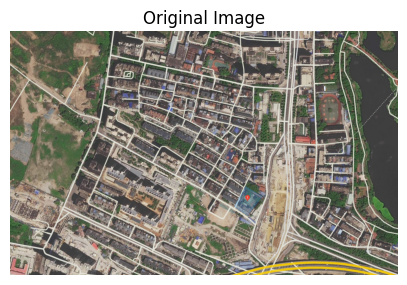

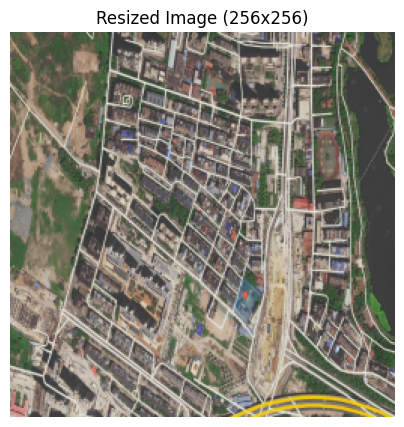

In [2]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your local PC
uploaded = files.upload()

# Check if any files were uploaded
if uploaded:
    # Get the first uploaded file
    file_name = list(uploaded.keys())[0]

    # Read the uploaded image
    image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), -1)

    # Display the original image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Resize the image to 256x256 without cropping
    resized_image = cv2.resize(image, (256,256),  interpolation = cv2.INTER_AREA)

    # Display the resized image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (256x256)")
    plt.axis('off')
    plt.show()
else:
    print("No files were uploaded.")


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ 读取卫星图像和总平面图
satellite_img = cv2.imread('/content/微信截图_20250319133233.png')
plan_img = cv2.imread('/content/plan1.png', cv2.IMREAD_UNCHANGED)  # 读取带透明度的图片

# 2️⃣ 统一尺寸，使 plan1.png 适应卫星图
plan_resized = cv2.resize(plan_img, (satellite_img.shape[1], satellite_img.shape[0]))

# 3️⃣ 将 plan1 的背景（白色部分）变透明
# 转换为灰度图
gray = cv2.cvtColor(plan_resized, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)  # 240以上认为是白色

# 反转 mask，获得前景区域
mask_inv = cv2.bitwise_not(mask)

# 提取 plan1 的前景（去掉白色）
plan_foreground = cv2.bitwise_and(plan_resized, plan_resized, mask=mask_inv)

# 提取卫星图的背景（即在 plan1 位置的部分抠掉）
satellite_background = cv2.bitwise_and(satellite_img, satellite_img, mask=mask)

# 4️⃣ 合并两张图片
result = cv2.add(satellite_background, plan_foreground)

# 5️⃣ 显示结果
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("合成后的卫星图")
plt.show()

# 6️⃣ 保存最终结果
output_path = "/content/合成卫星图.png"
cv2.imwrite(output_path, result)

# 7️⃣ 提供下载
files.download(output_path)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [57]:
import os
print(os.listdir("/content"))

['.config', '微信截图_20250319133233.png', 'MAP.zip', '社区设计用地.png', '347_buildings.csv', 'plan1 (1).png', 'B4_Groundplan_2011.png', 'folder1_archive', 'folder1_archive.zip', 'processed_images', 'B4_Groundplan_2011 (1).png', 'MAP', '合成卫星图.png', 'Urban_planning_GAN-SPL3-main.zip', 'Downloads', '347_buildings.csv.gz', 'Urban_planning_GAN-SPL3-main', 'plan1.png', 'drive', 'sample_data']


In [58]:
overlay_img = cv2.imread('/content/overlay.png')
if overlay_img is None:
    print("❌ overlay.png 读取失败，请检查文件路径或格式！")
else:
    print("✅ overlay.png 读取成功！")

❌ overlay.png 读取失败，请检查文件路径或格式！


In [5]:
import os
print(os.listdir("/content"))


['.config', '微信截图_20250319133233.png', 'sample_data']


In [7]:
import os
print(os.listdir("/content"))


['.config', '微信截图_20250319133233.png', 'sample_data']


In [8]:
from google.colab import files
uploaded = files.upload()


Saving B4_Groundplan_2011.png to B4_Groundplan_2011.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32456 (\N{CJK UNIFIED IDEOGRAPH-7EC8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

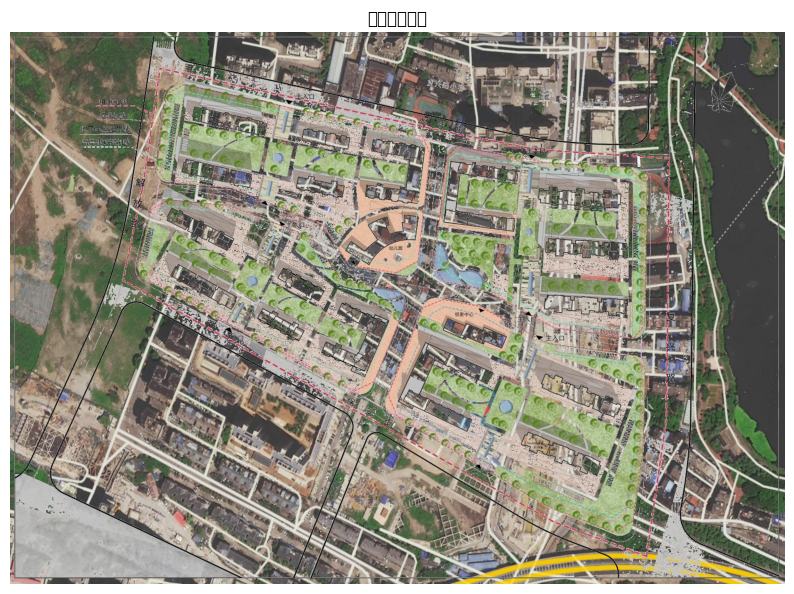

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1️⃣ 读取图片
overlay_img = cv2.imread('/content/B4_Groundplan_2011.png')  # 你的合成图（总平面图）
satellite_img = cv2.imread('/content/微信截图_20250319133233.png')  # 原始卫星图

# **检查图片是否读取成功**
if overlay_img is None:
    print("❌ 错误: plan1.png 读取失败，请检查路径！")
if satellite_img is None:
    print("❌ 错误: 卫星图 读取失败，请检查路径！")

# **确保 satellite_img 读取成功后再继续**
if satellite_img is not None and overlay_img is not None:
    # 2️⃣ 确保两张图片大小一致
    satellite_img = cv2.resize(satellite_img, (overlay_img.shape[1], overlay_img.shape[0]))

    # 3️⃣ 识别浅灰色区域（范围可调整）
    lower_gray = np.array([200, 200, 200])  # 近白色的灰度下限
    upper_gray = np.array([255, 255, 255])  # 近白色的灰度上限
    mask = cv2.inRange(overlay_img, lower_gray, upper_gray)  # 生成遮罩

    # 4️⃣ 从卫星图提取出对应区域
    background = cv2.bitwise_and(satellite_img, satellite_img, mask=mask)

    # 5️⃣ 从合成图中提取非浅灰色部分（前景）
    mask_inv = cv2.bitwise_not(mask)  # 反向遮罩（即保留有效信息）
    foreground = cv2.bitwise_and(overlay_img, overlay_img, mask=mask_inv)

    # 6️⃣ 合成最终图像
    result = cv2.add(background, foreground)

    # 7️⃣ 显示结果
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("最终合成图像")
    plt.show()

    # 8️⃣ 保存最终图像
    output_path = "/content/final_overlay.png"
    cv2.imwrite(output_path, result)

    # 9️⃣ 提供下载
    files.download(output_path)


In [3]:
# 1️⃣ 安装 Git（如果没有）
!apt-get install git

# 2️⃣ 配置 Git 用户信息（替换为你的 GitHub 信息）
!git config --global user.email "your-email@example.com"
!git config --global user.name "your-username"

# 3️⃣ 克隆你的 GitHub 仓库（替换为你的 GitHub 链接）
!git clone https://github.com/yvettezheng11/0319-urban-gan-learning.git

# 4️⃣ 进入克隆的仓库
%cd 0319-urban-gan-learning

# 5️⃣ 创建新分支
!git checkout -b colab-edits

# 6️⃣ 提交更改
!git add .
!git commit -m "Updated from Colab"

# 7️⃣ 推送到 GitHub
!git push origin colab-edits


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Cloning into '0319-urban-gan-learning'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: '0319-urban-gan-learning'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
